In [3]:
pip install matplotlib

                                              0.0/7.6 MB ? eta -:--:--
                                              0.1/7.6 MB 2.2 MB/s eta 0:00:04
     -                                        0.2/7.6 MB 3.0 MB/s eta 0:00:03
     ----                                     0.8/7.6 MB 6.0 MB/s eta 0:00:02
     -----------                              2.2/7.6 MB 12.5 MB/s eta 0:00:01
     -------------------                      3.7/7.6 MB 17.0 MB/s eta 0:00:01
     ------------------------                 4.6/7.6 MB 18.4 MB/s eta 0:00:01
     ------------------------                 4.6/7.6 MB 18.4 MB/s eta 0:00:01
     ---------------------------------------- 7.6/7.6 MB 21.2 MB/s eta 0:00:00
                                              0.0/480.5 kB ? eta -:--:--
     ---------------------------------------- 480.5/480.5 kB ? eta 0:00:00
                                              0.0/2.1 MB ? eta -:--:--
     ---------------------------------------  2.1/2.1 MB 68.4 MB/s eta 0:00:01
  

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install seaborn


  Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\nuttapong.but\AppData\Local\Temp\ipykernel_17700\3472774747.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Z_Score'] = (filtered_df['Value'] - mean) / std_dev
C:\Users\nuttapong.but\AppData\Local\Temp\ipykernel_17700\3472774747.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_no_outliers_df['Group'] = filtered_no_outliers_df['Value'].apply(lambda x: categorize(x, quantiles))


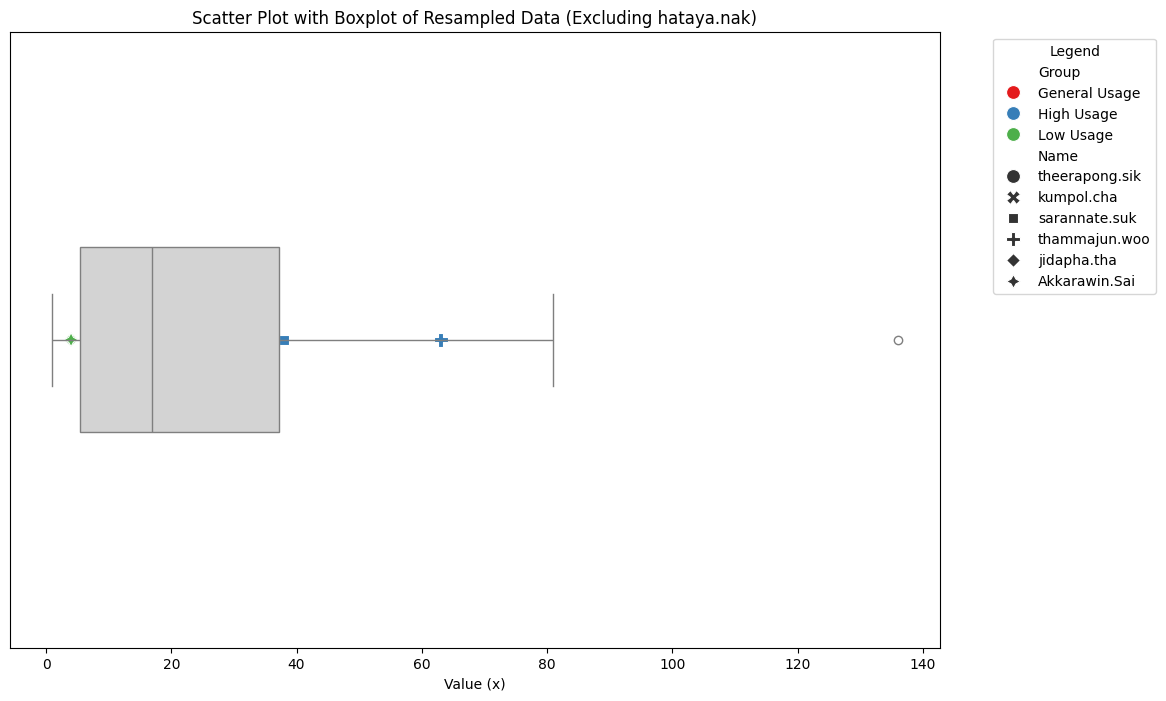

In [5]:
# Re-import necessary libraries and prepare the data again
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the original dataframe
data_str = """
supimon.tos	225
waraporn.wat	188
jakapong.kho	162
nuttapon.tan	136
wipawee.run	103
piyachai.pun	94
toshsaporn.mon	93
areerat.goo	88
jutamas.kul	85
Woranart.hon	81
hataya.nak	73
kamolpat.kas	73
porntida.suk	71
suree.phi	71
chutima.hon	66
vijak.jet	66
thammajun.woo	63
sopida.wor	62
nuttapong.but	60
thansika.mua	57
bantita.kha	51
tutpol.mat	46
rasa.won	44
kunlanun.lea	39
sarannate.suk	38
apisara.suk	37
suwat.pun	29
wimon.won	23
parittapon.sun	22
kumpol.cha	21
krid.suw	20
saranapob.tha	19
tassanan.tan	15
busarin.cho	13
chadakarn.man	12
it.helpdesk	12
theerapong.sik	11
kantapat.anu	7
nareerat.cha	6
pakawat.tap	6
patson.ara	6
suda.tun	6
siwawut.sal	5
Akkarawin.Sai	4
jidapha.tha	4
kulasorn.lom	3
metus.lue	3
nopphawan.lap	2
chonticha.dua	1
suphawadee.jun	1
"""
data_list = [line.split('\t') for line in data_str.strip().split('\n')]
df = pd.DataFrame(data_list, columns=['Name', 'Value'])
df['Value'] = df['Value'].astype(int)

# Prepare the ignore list
ignore_list = """
waraporn.wat
wipawee.run
piyachai.pun
jutamas.kul
suree.phi
chutima.hon
vijak.jet
sopida.wor
thansika.mua
bantita.kha
jakapong.kho
kamolpat.kas
nuttapong.but
it.helpdesk
nareerat.cha
siwawut.sal
metus.lue
kunlanun.lea
suwat.pun
hataya.nak
pakawat.tap
suda.tun
areerat.goo
rasa.won
toshsaporn.mon
"""
ignore_names = ignore_list.strip().split('\n')

# Remove rows from the DataFrame based on the ignore list
filtered_df = df[~df['Name'].isin(ignore_names)]

# Calculate basic statistics
mean = filtered_df['Value'].mean()
std_dev = filtered_df['Value'].std()

# Calculate the z-scores
filtered_df['Z_Score'] = (filtered_df['Value'] - mean) / std_dev

# Identify and exclude outliers based on Z-score method (absolute value of Z-score > 2)
filtered_no_outliers_df = filtered_df[filtered_df['Z_Score'].abs() <= 2]

# Define the groups based on quantiles
quantiles = filtered_no_outliers_df['Value'].quantile([0.33, 0.66])

# Create a function to categorize each row
def categorize(value, quantiles):
    if value <= quantiles.iloc[0]:
        return 'Low Usage'
    elif value <= quantiles.iloc[1]:
        return 'General Usage'
    else:
        return 'High Usage'

# Apply the function to the DataFrame
filtered_no_outliers_df['Group'] = filtered_no_outliers_df['Value'].apply(lambda x: categorize(x, quantiles))

# Randomly resample two representatives from each group again
resampled_no_hataya_df = filtered_no_outliers_df.groupby('Group').apply(lambda x: x.sample(2)).reset_index(drop=True)

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Value', y=np.zeros_like(resampled_no_hataya_df['Value']), 
                hue='Group', style='Name', s=100, data=resampled_no_hataya_df, palette='Set1')

# Add boxplot for better visualization of distribution
sns.boxplot(x='Value', data=filtered_no_outliers_df, color='lightgrey', width=0.3)

# Set labels and title
plt.xlabel('Value (x)')
plt.yticks([])  # Remove y-axis labels
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Scatter Plot with Boxplot of Resampled Data (Excluding hataya.nak)')

# Show the plot
plt.show()




In [6]:
# Show the final resampled representatives
print(resampled_no_hataya_df[['Name', 'Value', 'Group']])

             Name  Value          Group
0  theerapong.sik     11  General Usage
1      kumpol.cha     21  General Usage
2   sarannate.suk     38     High Usage
3   thammajun.woo     63     High Usage
4     jidapha.tha      4      Low Usage
5   Akkarawin.Sai      4      Low Usage
